## PART- IV, Regression Models with Random Forest**
## In **Part 4**, we will be building a regression model of coronavirus inhibitors using the random forest algorithm.

## 4.1 Importing libraries

In [ ]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# both should be 1.3.2 as it is the same version used in anaconda for deployment
import sklearn
import joblib

print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

scikit-learn version: 1.3.2
joblib version: 1.3.2


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 4.2 Loading dataset

In [ ]:
data1= pd.read_csv('/content/RUNX1_bioactivity_class_2_pIC50_pubchem_fp.csv')
data1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.653647
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.258848
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.440093
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.262807
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.473661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
90,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.892485
91,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.439316
92,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


In [ ]:
data1.isnull().sum()

PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
PubchemFP4      0
               ..
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
pIC50           0
Length: 882, dtype: int64

## 4.3 Input features

The dataset contains 881 input features and 1 output variables(pIC50 values)

In [ ]:
X= data1.drop('pIC50',axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
90,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(94, 881)

## 4.4 Output Features

In [ ]:
Y= data1.pIC50
Y

0     5.653647
1     5.258848
2     4.440093
3     5.262807
4     4.473661
        ...   
89    4.301030
90    4.892485
91    5.439316
92    4.000000
93    4.000000
Name: pIC50, Length: 94, dtype: float64

In [ ]:
Y.shape

(94,)

## 4.5 Remove low variance features

In [ ]:
import pandas as pd
import numpy as np

def remove_low_variance(input_data, threshold=0.1):
    if isinstance(input_data, pd.DataFrame):
        columns = input_data.columns
    elif isinstance(input_data, np.ndarray):
        columns = np.arange(input_data.shape[1])
    else:
        raise ValueError("Input data must be a pandas DataFrame or a NumPy array.")

    # Calculate variance for each column
    variances = np.var(input_data, axis=0)

    # Select columns with variance above the threshold
    selected_columns = columns[variances >= threshold]

    # Extract selected columns from the original data
    selected_data = input_data[selected_columns]

    return selected_data

# Example usage
X = remove_low_variance(X, threshold=0.1)
print(X.shape)


(94, 248)


In [ ]:
X.to_csv('descriptor_list.csv', index= False)

## 4.6 Data Split (80/20 ratio)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2)

In [ ]:
X_train.shape, Y_train.shape

((75, 248), (75,))

In [ ]:
Y_test.shape, Y_test.shape

((19,), (19,))

## 4.8 Building a Regression Model using various models

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
def evaluate_model(true_values, predicted_values, model_name):
    mse = mean_squared_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)

    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("\n")

## 1. Linear Regression

In [ ]:
# Set the random seed for reproducibility
np.random.seed(100)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_y_pred = linear_model.predict(X_test)
evaluate_model(Y_test, linear_y_pred, "Linear Regression")

Linear Regression Evaluation:
Mean Squared Error (MSE): 30966163552459106025472.00
R-squared (R2): -59902768743197530128384.00




Text(0.5, 1.0, 'Linear Regressor-- Predictions vs Actual')

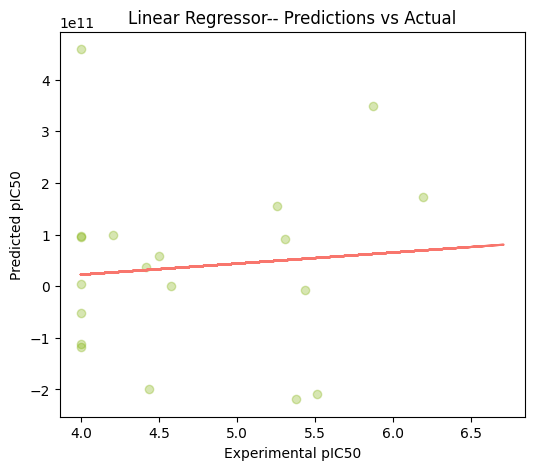

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(x=Y_test, y= linear_y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_test, linear_y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.title('Linear Regressor-- Predictions vs Actual')

## 2. Decision Tree Regressor

In [ ]:
# Decision Tree Regressor with Hyperparameter Tuning
dt_param_grid = {'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid.fit(X_train, Y_train)
dt_y_pred = dt_grid.predict(X_test)
evaluate_model(Y_test, dt_y_pred, "Decision Tree Regressor (Tuned)")

Decision Tree Regressor (Tuned) Evaluation:
Mean Squared Error (MSE): 1.38
R-squared (R2): -1.68




Text(0.5, 1.0, 'Decision Tree Regressor-- Predictions vs Actual')

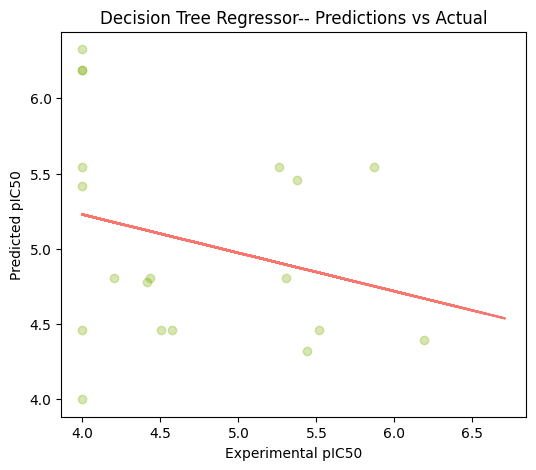

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(x=Y_test, y=dt_y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_test, dt_y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.title('Decision Tree Regressor-- Predictions vs Actual')

## 3. Random Forest Regressor

In [ ]:
# Random Forest Regressor with Hyperparameter Tuning
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid.fit(X_train, Y_train)
rf_y_pred = rf_grid.predict(X_test)
evaluate_model(Y_test, rf_y_pred, "Random Forest Regressor (Tuned)")

Random Forest Regressor (Tuned) Evaluation:
Mean Squared Error (MSE): 0.51
R-squared (R2): -0.08




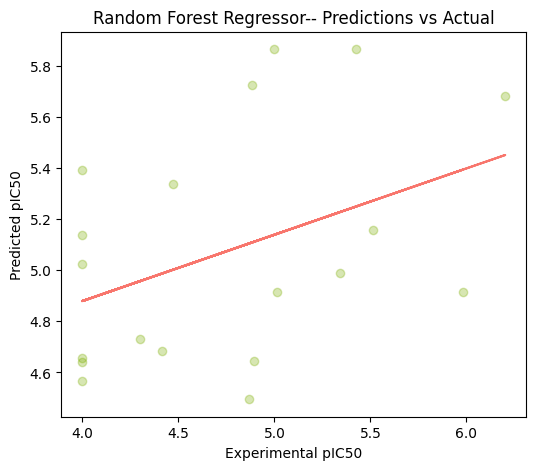

In [ ]:
import matplotlib.pyplot as plt
# Plotting the predictions
plt.figure(figsize=(6, 5))
plt.scatter(x=Y_test, y=rf_y_pred, c="#7CAE00", alpha=0.3)

# Fit a regression line
z = np.polyfit(Y_test, rf_y_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), "#F8766D")

plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.title('Random Forest Regressor-- Predictions vs Actual')

# Show the plot
plt.show()

## 4. XGBoost Regressor

In [ ]:
# XGBoost Regressor with Hyperparameter Tuning
xgb_param_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'max_depth': [3, 5, 7]}
xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid.fit(X_train, Y_train)
xgb_y_pred = xgb_grid.predict(X_test)
evaluate_model(Y_test, xgb_y_pred, "XGBoost Regressor (Tuned)")

XGBoost Regressor (Tuned) Evaluation:
Mean Squared Error (MSE): 0.71
R-squared (R2): -0.37




Text(0.5, 1.0, 'XGBoost Regressor-- Predictions vs Actual')

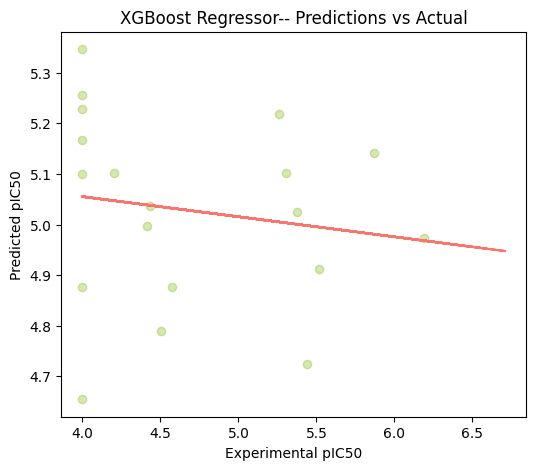

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(x=Y_test, y=xgb_y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_test, xgb_y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.title('XGBoost Regressor-- Predictions vs Actual')

Among these models, the Random Forest Regressor has the highest R2 score (though still quite low) and the lowest MSE/RMSE values, therefore fitting the model for deployment.

In [ ]:
# Random Forest Regressor without Hyperparameter Tuning
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)
evaluate_model(Y_test, rf_y_pred, "Random Forest Regressor (UnTuned)")

Random Forest Regressor (UnTuned) Evaluation:
Mean Squared Error (MSE): 0.70
R-squared (R2): -0.16




# Save Model as Pickle Object

In [ ]:
import pickle

In [ ]:
from joblib import dump, load

# Save the model
dump(rf_model, 'RUNX1_model.joblib')

['RUNX1_model.joblib']